## Problem 1: EU Cities Temperatures

> Given a CSV data file as represented by the sample file [EuCitiesTemperatures.csv (213 records), load it into a Pandas DataFrame and perform the following tasks on it.


In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Preprocessing/Analysis (28 pts)
---

1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.


In [12]:
df = pd.read_csv('./EuCitiesTemperatures.csv')
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [13]:
country_means = df.groupby('country')[['latitude', 'longitude']].transform('mean')

df['latitude'].fillna(country_means['latitude'], inplace=True)
df['longitude'].fillna(country_means['longitude'], inplace=True)

df = df.round({'latitude': 2, 'longitude': 2})

df[["latitude", "longitude"]]

,latitude,longitude
0,41.12,20.08
1,42.50,1.52
2,47.85,11.41
3,47.08,14.02
4,48.32,14.29
...,...,...
208,55.95,-2.94
209,50.70,-3.53
210,53.55,-4.23
211,55.87,-4.25


2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [14]:
df = df.copy()

df = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]

# Group by 'country' and count the number of cities
country_counts = df['country'].value_counts()

# Find the maximum count
max_count = country_counts.max()

# Find the countries with the maximum count
max_countries = country_counts[country_counts == max_count]

print(max_countries)

Romania    9
Poland     9
Name: country, dtype: int64


3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [15]:
region_means = df.groupby(['EU', 'coastline'])['temperature'].transform('mean')

# Fill missing values with the region averages
df['temperature'].fillna(region_means, inplace=True)

df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.860
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.280
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.930
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.420
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.160
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,10.636
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.020
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.060


---

### Visualization (27 pts)
For all plots, make sure to label the axes, and set appropriate tick labels.




[6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

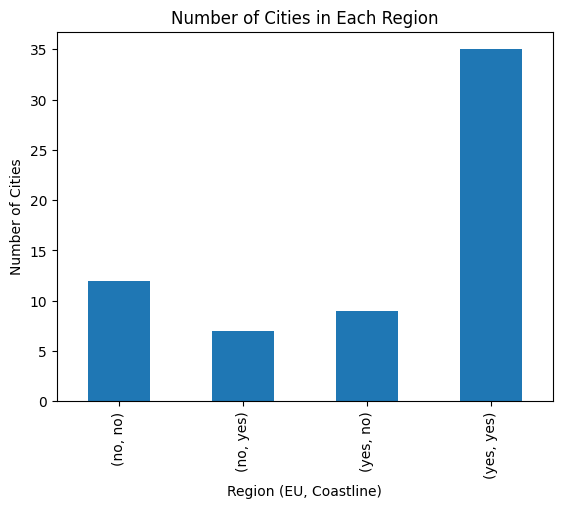

In [16]:
region_counts = df.groupby(['EU', 'coastline'])['city'].count()

region_counts.plot(kind='bar')

plt.title('Number of Cities in Each Region')
plt.xlabel('Region (EU, Coastline)')
plt.ylabel('Number of Cities')

plt.show()

[7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

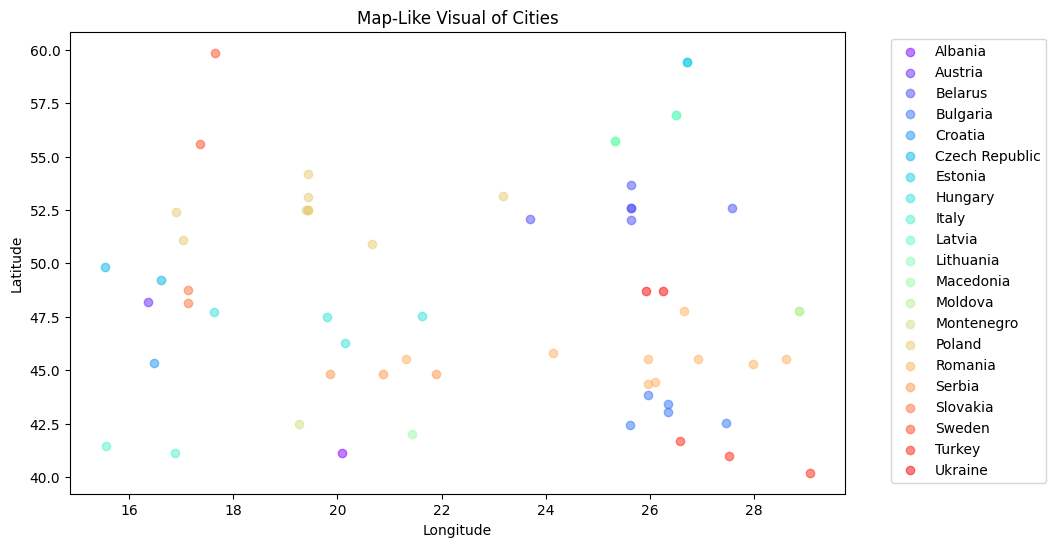

In [17]:
countries = df['country'].unique()

colors = plt.cm.rainbow(np.linspace(0, 1, len(countries)))

plt.figure(figsize=(10, 6))

# Plot a scatter plot for each country
for i, country in enumerate(countries):
    df_country = df[df['country'] == country]
    plt.scatter(df_country['longitude'], df_country['latitude'], color=colors[i], label=country, alpha=0.5)

plt.title('Map-Like Visual of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

[6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

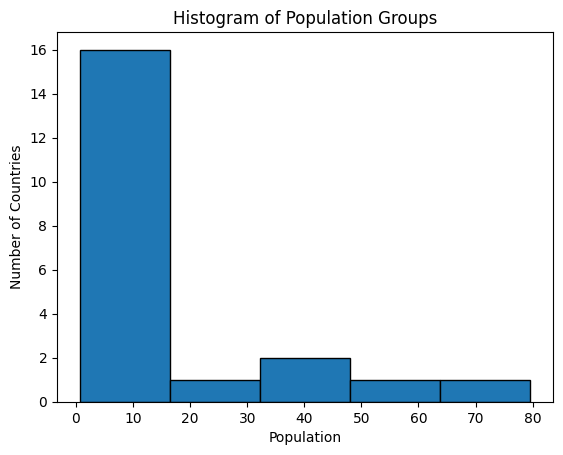

In [18]:
populations = df.drop_duplicates('country')['population']

# Plot a histogram of the population values
plt.hist(populations, bins=5, edgecolor='black')

plt.title('Histogram of Population Groups')
plt.xlabel('Population')
plt.ylabel('Number of Countries')

plt.show()

[8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

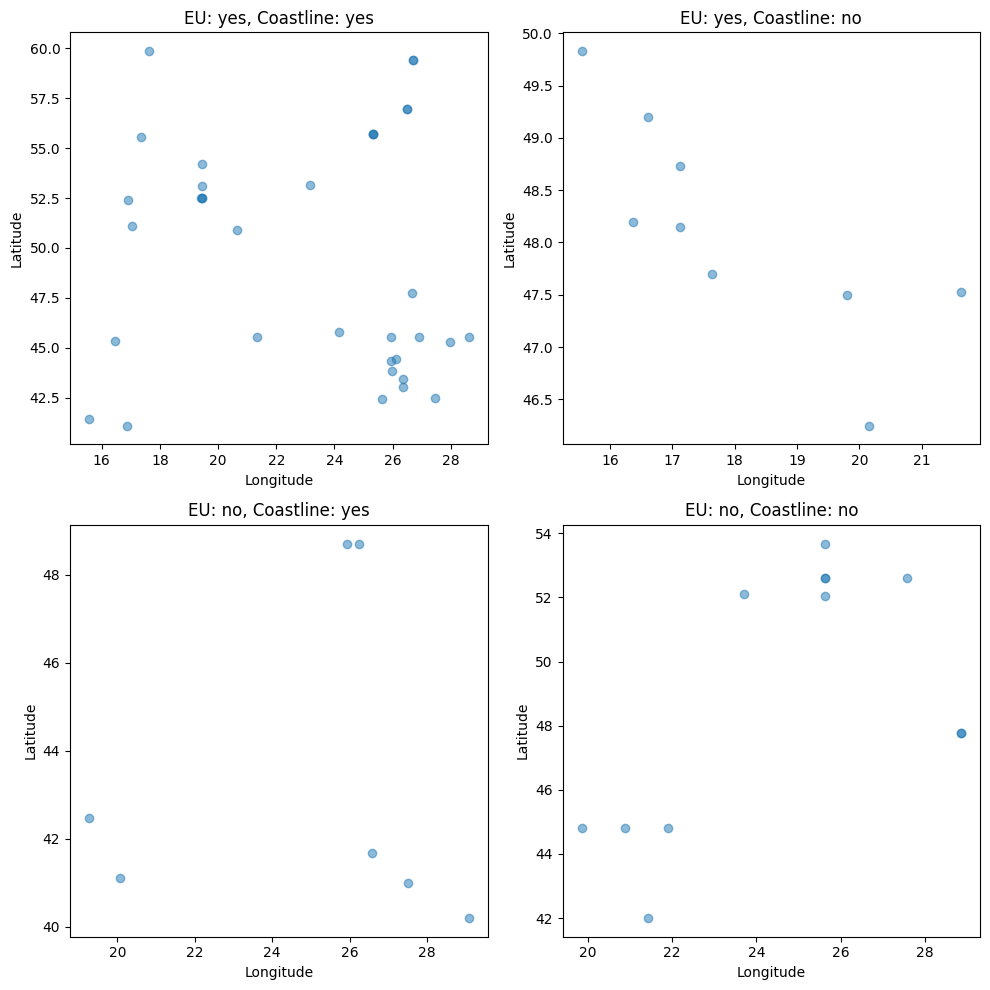

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Define the region types in a list of tuples
region_types = [('yes', 'yes'), ('yes', 'no'), ('no', 'yes'), ('no', 'no')]

# Plot a scatter plot for each region type
for ax, (eu, coastline) in zip(axs.flatten(), region_types):
    df_region = df[(df['EU'] == eu) & (df['coastline'] == coastline)]
    ax.scatter(df_region['longitude'], df_region['latitude'], alpha=0.5)
    ax.set_title(f'EU: {eu}, Coastline: {coastline}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

plt.show()